In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import os
import matplotlib.pyplot as plt
from pylab import rcParams

plt.style.use('ggplot')
%pylab inline --no-import-all

#有効数字2桁
%precision 3

#風力発電初期値
Pr=2.3 #定格電力
V_CIN=2.5 #カットイン風速
V_rat=20 #
V_CO=20 #カットアウト風速
H=30.5 #高さ
H_top=80 #風速計測の高さ（高い）
H_ref=10 #風速計測の高さ（低い）
atm_pre0=1.225 #基準大気圧
total_cost = 1575000 #コスト[yen/unit]
Op_year = 10 #稼動年数
cost = (total_cost/(Op_year*365*24)) #コスト[yen/hour/unit]

#インプットデータ
input_data = pd.read_csv('hakata_ekimae_2017_data_from_meteoblue.csv')
#temp = temp.drop("気温(℃).1",axis=1)
#temp = temp.drop("気温(℃).2" ,axis=1)

#列名の変更
input_data.columns = ['Year', 'Month', 'Day','Hour', 'Minute','Temperature(2m)', 'Mean Sea Level Pressure[hpa]', \
                      'Shortwave Radiation[W/m2]','Wind Speed(10m)[m/s]','Wind Direction(10m)' ,'Wind Speed(80m)[m/s]'\
              , 'Wind Direction(80m)']

#日付型などの変更
input_data['Date'] = input_data[['Year', 'Month', 'Day']].apply(lambda x: '{}@{}@{}'.format(x[0], x[1], x[2]), axis=1)
Date = input_data['Date']
input_data['Date'] =pd.to_datetime(Date, format='%Y@%m@%d')

input_data['Time'] = input_data[['Year', 'Month', 'Day','Hour']].apply(lambda x: '{}@{}@{}@{}'.format(x[0], x[1], x[2],x[3]), axis=1)
Time = input_data['Time']
input_data['Time'] =pd.to_datetime(Time, format='%Y@%m@%d@%H')

    #列の順番変更
    #lst = input_data.columns.tolist()
    #lst.remove('Date')
    #lst.remove('Time')
    #lst.insert(0, 'Time')
    #lst.insert(1, 'Date')

Populating the interactive namespace from numpy and matplotlib


In [2]:
V_COE = np.log(input_data['Wind Speed(80m)[m/s]']/input_data['Wind Speed(10m)[m/s]'])\
    /np.log(H_top/H_ref)


input_data['V_COE[power law]']=V_COE
input_data['ρ(air dencity)']=input_data['Mean Sea Level Pressure[hpa]'] / (2.87*273.15+2.87*input_data['Temperature(2m)'])
input_data['Wind Speed('+str(H)+')[m/s]']=input_data['Wind Speed(10m)[m/s]'] *(H / H_ref)**V_COE

In [3]:
wind30_values =input_data['Wind Speed('+str(H)+')[m/s]']

Pwt=(np.where((V_rat<=wind30_values) & (wind30_values <= V_CO), Pr,\
              np.where((V_CIN<=wind30_values) & (wind30_values <= V_rat), \
                       Pr*(wind30_values-V_CIN)/(V_rat-V_CIN),0 )))
#Pwt_STP
Pwt_STP=(atm_pre0/input_data['ρ(air dencity)'].values)*Pwt

input_data['Pwt[kW]']= pd.Series(Pwt)
input_data['Pwt_STP[kW]']= pd.Series(Pwt_STP)

#よく使う列だけ表示
dis = input_data.columns.tolist()
dis = ['Time','Pwt', 'Temperature(2m)','Wind Speed('+str(H)+')[m/s]', 'Mean Sea Level Pressure[hpa]','ρ(air dencity)',\
       'Shortwave Radiation[W/m2]', 'Wind Speed(10m)[m/s]',\
       'Wind Speed(80m)[m/s]','V_COE[power law]','Pwt_STP']

input_data.to_csv('Wind_result.csv',encoding="shift_jis")   

/home/ec2-user/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


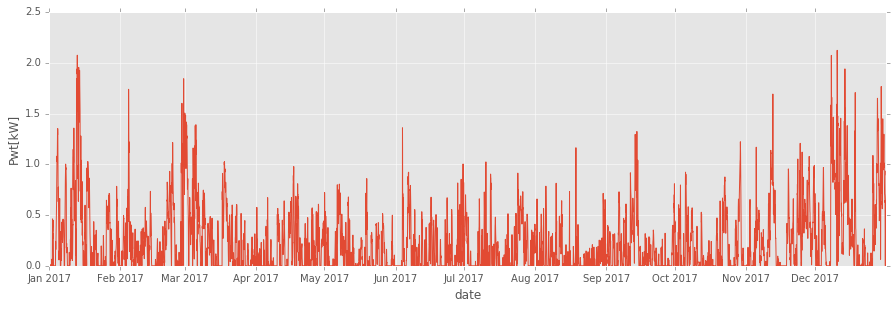

In [4]:
rcParams['figure.figsize'] = 15,10

input1 = input_data['Time']
output1 = input_data['Pwt[kW]']

fig = plt.figure(figsize=(45,20),dpi=200)

fig = plt.figure()
input_data = fig.add_subplot(2,1,1)

input_data.plot(input1, output1)

input_data.set_xlabel('date')
input_data.set_ylabel('Pwt[kW]')
#df3.set_xlim([0, 90000])
input_data.set_ylim([0, 2.5])
input_data.grid(True)

fig.show()

In [5]:
rcParams['figure.figsize'] = 15,10

input1 = input_data['Time']
output1 = input_data['Wind Speed(10m)[m/s]']

fig = plt.figure(figsize=(45,20),dpi=200)

fig = plt.figure()
input_data = fig.add_subplot(2,1,1)

input_data.plot(input1, output1)

input_data.set_xlabel('date')
input_data.set_ylabel('Wind Speed(10m)[m/s]')
#df3.set_xlim([0, 90000])
input_data.set_ylim([0, 25])
input_data.grid(True)

fig.show()

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
rcParams['figure.figsize'] = 15,10

input1 = input_data['Time']
output1 = input_data['Pwt[kW]']

fig = plt.figure(figsize=(45,20),dpi=200)

fig = plt.figure()
input_data = fig.add_subplot(2,1,1)

input_data.plot(input1, output1)

input_data.set_xlabel('date')
input_data.set_ylabel('Pwt[kW]')
#df3.set_xlim([0, 90000])
input_data.set_ylim([0, 2.5])
input_data.grid(True)

fig.show()